## Proyek Analisis Data: E-Commerce Public Dataset
- Nama : Muhammad Hanif Sya'bani
- Email : mh070940@gmail.com
- ID Dicoding : hnfx131

## Menentukan Pertanyaan Bisnis
- Bagaimana dampak cuaca(temperatur, wind speed, humidity) mempengaruhi total penyewaan sepeda?
- Bagaimna perkembangan penyewaan sepeda selama sepanjang bulan dalam satu tahun?
- Bagaimana perbandingan antara jumlah peminjaman oleh pengguna terdaftar (registered) dan pengguna non-terdaftar (casual) setiap bulan ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membaca dataset diambil dari folder data

In [2]:
day_data = pd.read_csv('data/day.csv')

Menampilkan dataset

In [3]:
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

Pada tahap ini saya memastikan bahwa tidak ada nilai yang hilang dan tidak ada data yang duplicate, ini dialkukan agar data clean dan memastikan kualitas data bagus

In [4]:
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 Cek data duplicate jika ada

In [5]:
print(day_data.duplicated().sum())

0


### Cleaning Data

 Dataset sudah tidak ada missing value dan duplicate data

### Exploratory Data Analysis (EDA)

 Melihat diskripsi data menggunakan method describe dilakukan agar melihat statistik data yang bertipe number

In [6]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Visualization & Explanatory Analysis

#### Pertanyaan 1
- Bagaimana dampak cuaca(temperatur, wind speed, humidity) mempengaruhi total penyewaan sepeda?

Untuk menjawab pertanyaan ini saya menggunakan ScatterPlot untuk melihat dan menganalisis perbandingan  suhu, kelembaban, kecepatan angin terhadap jumlah penyewaan sepeda

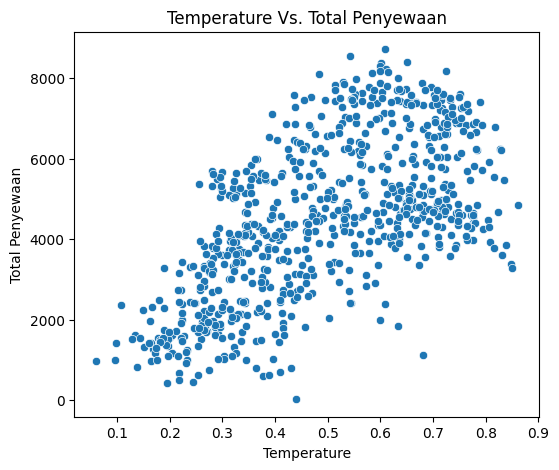

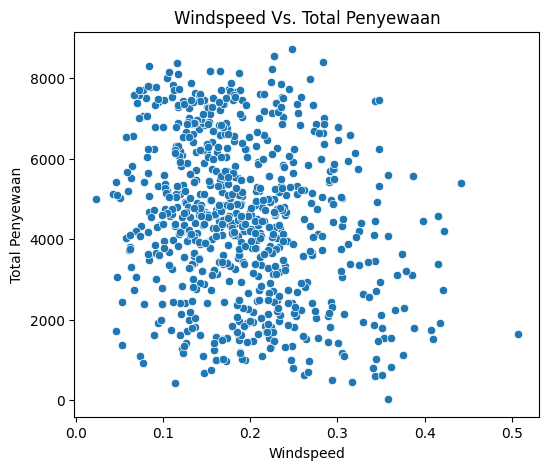

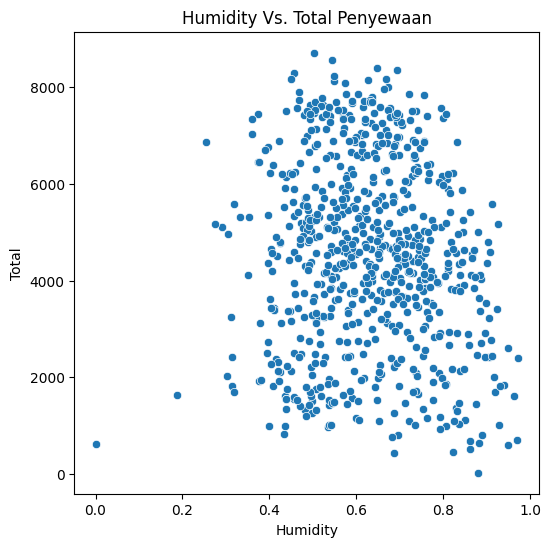

In [7]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Temperature Vs. Total Penyewaan')
plt.xlabel('Temperature')
plt.ylabel('Total Penyewaan')
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x='windspeed', y='cnt', data=day_data)
plt.title('Windspeed Vs. Total Penyewaan')
plt.xlabel('Windspeed')
plt.ylabel('Total Penyewaan')
plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x='hum', y='cnt', data=day_data)
plt.title('Humidity Vs. Total Penyewaan')
plt.xlabel('Humidity')
plt.ylabel('Total')
plt.show()



Untuk melihat lebih jelas saya mengunakan regplot untuk melihat pengaruh nya dengan ada tambahan line  

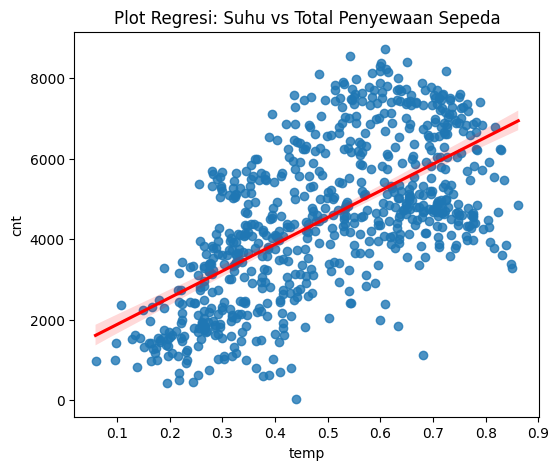

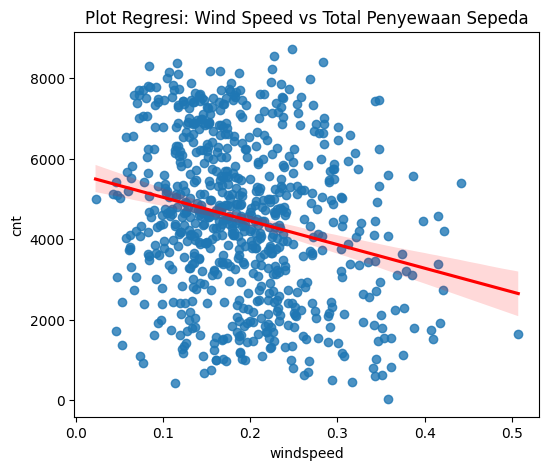

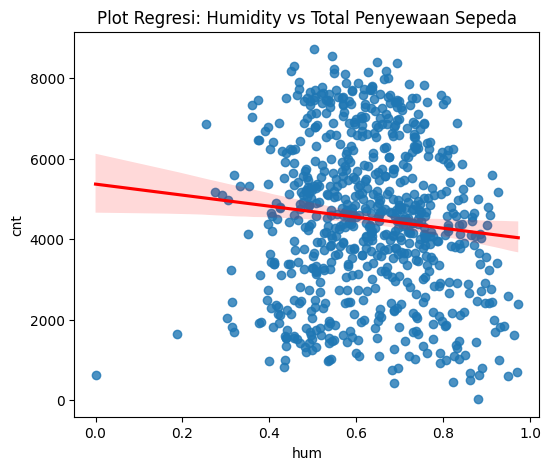

In [8]:
plt.figure(figsize=(6,5))
sns.regplot(x='temp', y='cnt', data=day_data, line_kws={'color': 'red'})
plt.title('Plot Regresi: Suhu vs Total Penyewaan Sepeda')
plt.show()

plt.figure(figsize=(6,5))
sns.regplot(x='windspeed', y='cnt', data=day_data, line_kws={'color': 'red'})
plt.title('Plot Regresi: Wind Speed vs Total Penyewaan Sepeda')
plt.show()

plt.figure(figsize=(6,5))
sns.regplot(x='hum', y='cnt', data=day_data, line_kws={'color': 'red'})
plt.title('Plot Regresi: Humidity vs Total Penyewaan Sepeda')
plt.show()

#### Pertanyaan 2
- Bagaimana perkembangan penyewaan sepeda per bulan dalam satu tahun?

Untuk menjawab pertanyaan ini saya menggunakan lineplot untuk melihat dengan lebih jelas. 
Pertama saya ubah terlebih dahulu fitur bulan supaya memudahkan pengguna untuk membaca dan menganalisis

In [9]:
bulan = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}

day_data['mnth'] = day_data['mnth'].map(bulan)

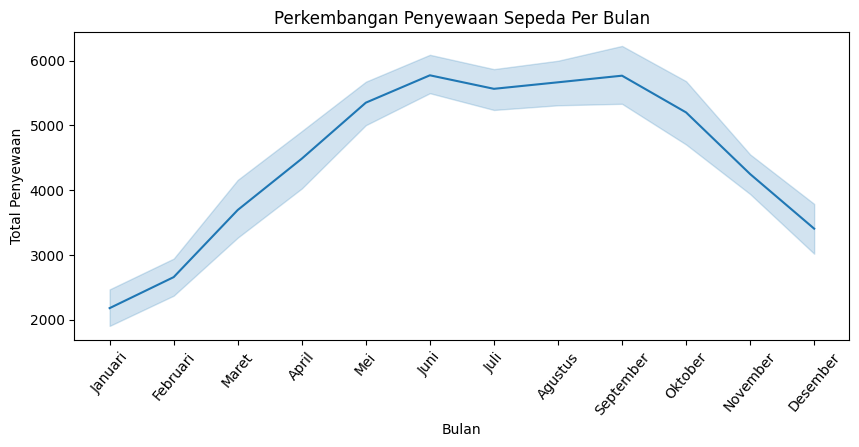

In [10]:
plt.figure(figsize=(10,4))
sns.lineplot(x='mnth', y='cnt', data=day_data)
plt.title('Perkembangan Penyewaan Sepeda Per Bulan')
plt.xticks(rotation=50)
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')
plt.show()

#### Pertanyaan 3
- Bagaimana perbandingan antara jumlah peminjaman oleh pengguna terdaftar (registered) dan pengguna non-terdaftar (casual) setiap bulan ?

Untuk menjawab pertanyaan ini saya menggunakan barplot untuk melihat perbandingan antara pengguna terdaftar(registered) dan tidak terdaftar(casual)

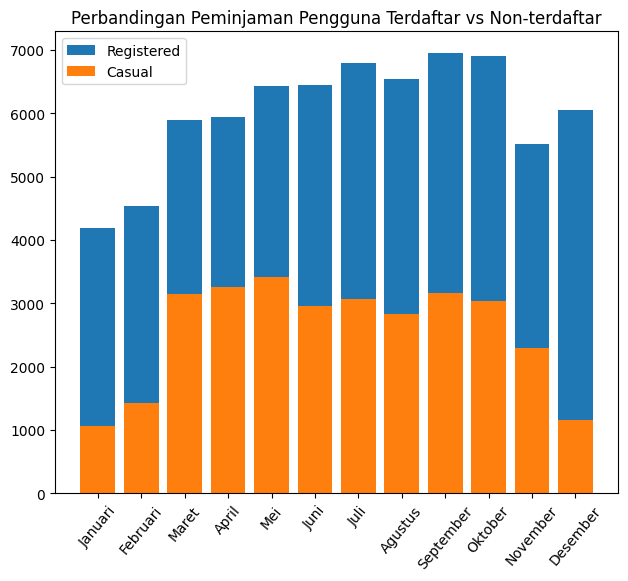

In [16]:
plt.figure(figsize=(16,6), dpi=100)
plt.subplot(1,2,1)
plt.bar(day_data['mnth'], day_data['registered'])
plt.bar(day_data['mnth'], day_data['casual'])
plt.title('Perbandingan Peminjaman Pengguna Terdaftar vs Non-terdaftar')
plt.legend(['Registered', 'Casual'])
plt.xticks(rotation=50)
plt.show()

### Conlusion

#### Pertanyaan 1

- Berdasarkan hasil analisis dan visualisasi apakah cuaca mempengaruhi tren penyewaan sepeda. Berdasarkan hasil analisis, untuk suhu itu semakin meningkat suhu maka tingkat penyewaan sepeda semakin banyak, dibuktikan dengan menggunakan regplot garis ny semakin meningkat. Untuk kecepatan angin, penyewaan sepeda paling banyak di antara 0,1 - 0,3 semakin banyak angin mungkin pengguna semakin tidak nyaman. Sementara itu untuk kelembaban bertumpuk pada 0,4 - 1. Meskipun tidak ada pola yang jelas, ini menandakan kelembaban mungkin tidak menjadi faktor utama dalam tingkat penyewaan sepeda

#### Pertanyaan 2

- Berdasarkan visualisasi tingkat penyewaaan semakin meningkat mulai dari januari sampai puncaknya di bulan Juni dan September dikarenakan cuaca yang lebih hangat sehingga memunkinkan untuk bersepeda sehingga tingkat penyewaan menjadi tinggi. Kemudian setelah September terjadi penurunan yang mungkin dikaitkan dengan perubahan cuaca menjadi lebih dingin sehingga terjadi penurunan penyewaan sepeda

#### Pertanyaan 3
- Berdasarkan hasil visualisasi diatas pengguna terdafatar lebih mendominasi walau tidak beda jauh tapi pengguna terdaftar selalu lebih tinggi di setiap bulan. Peminjaman sepeda oleh pengguna casual cenderung meningkat selama bulan musim panas (Juni hingga September), yang kemungkinan dipengaruhi oleh cuaca yang lebih baik untuk kegiatan luar ruangan dan terjadi penurunan baik pengguna terdaftar maupun tidak terdaftar yang mungkin disebabkan cuaca yang buruk diakhir tahun